In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('headbrain.csv')

In [3]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


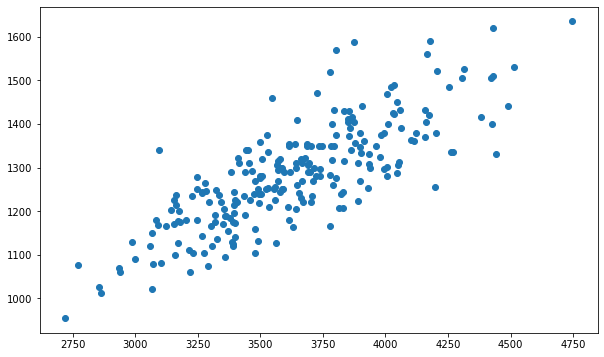

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(df['Head Size(cm^3)'], df['Brain Weight(grams)'])
plt.show()

In [5]:
X = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

In [9]:
X = np.reshape(X, (-1,1))

In [10]:
y = np.reshape(y, (-1,1))

In [11]:
# Feature Scaling
# - Normalization
# - Standardization

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
minmax = MinMaxScaler()
X = minmax.fit_transform(X)

In [14]:
y = minmax.fit_transform(y)

In [15]:
X[:5]

array([[0.88406512],
       [0.50222003],
       [0.7602368 ],
       [0.52146029],
       [0.71879625]])

In [16]:
y[:5]

array([[0.84558824],
       [0.50294118],
       [0.55882353],
       [0.48088235],
       [0.93382353]])

In [29]:
def gradientDescent(X,y,epochs,alpha):
    slope, inter = 0, 0
    n = len(X)
    for i in range(epochs):
        y_pred = slope * X + inter
        loss = y_pred - y
        grad_slope = (2/n) * loss.T.dot(X)
        grad_inter = (2/n) * np.sum(loss)
        slope = slope - grad_slope * alpha
        inter = inter - grad_inter * alpha
    return slope[0][0], inter

In [76]:
epochs = 10000
alpha = 0.01
slope, inter = gradientDescent(X,y,epochs,alpha)

In [77]:
slope, inter

(0.7824164623609702, 0.12940368086748408)

In [78]:
predictions = []
n = len(X)
for i in range(n):
    y_pred = slope * X[i] + inter
    predictions.append(y_pred)

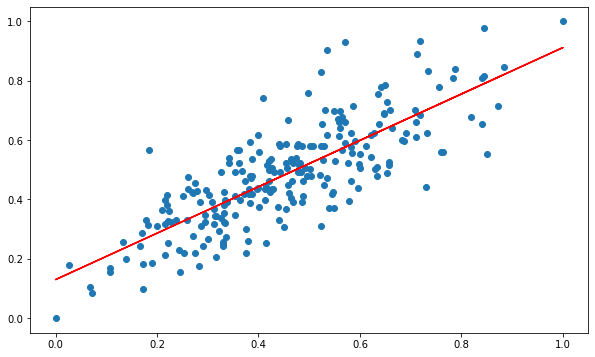

In [79]:
plt.figure(figsize=(10,6))
plt.scatter(X, y)
plt.plot(X, predictions, 'r')
plt.show()